<a href="https://colab.research.google.com/github/TinaTing08/Machine-Learning/blob/main/Climate_Change_and_CO2_levels_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 

from pylab import rcParams
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
init_notebook_mode(connected=True)

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#https://drive.google.com/file/d/1wgeOuwRv0VpZ0-QoctRgRmqmXQD6PahL/view?usp=share_link

file = drive.CreateFile({'id':'1wgeOuwRv0VpZ0-QoctRgRmqmXQD6PahL'}) 
file.GetContentFile('co2.csv') 
Co2_df  = pd.read_csv('co2.csv', parse_dates=['date'], index_col='date')
Co2_df.head(10)

,co2
date,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
1958-05-03,316.9
1958-05-10,NaN
1958-05-17,317.5
1958-05-24,317.9


In [ ]:
Co2_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


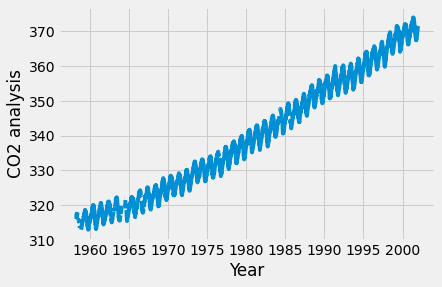

In [ ]:
plt.xlabel('Year')
plt.ylabel('CO2 analysis')
plt.plot(Co2_df)

In [ ]:
y = Co2_df['co2'].resample('MS').mean()
y

date
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

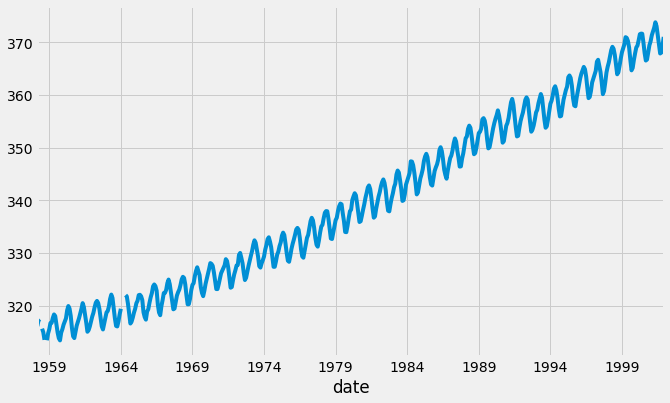

In [ ]:
y.plot(figsize=(10, 6))
plt.show()

In [ ]:
y.describe()

count    521.000000
mean     339.822665
std       17.068711
min      313.400000
25%      324.125000
50%      337.950000
75%      354.675000
max      373.800000
Name: co2, dtype: float64

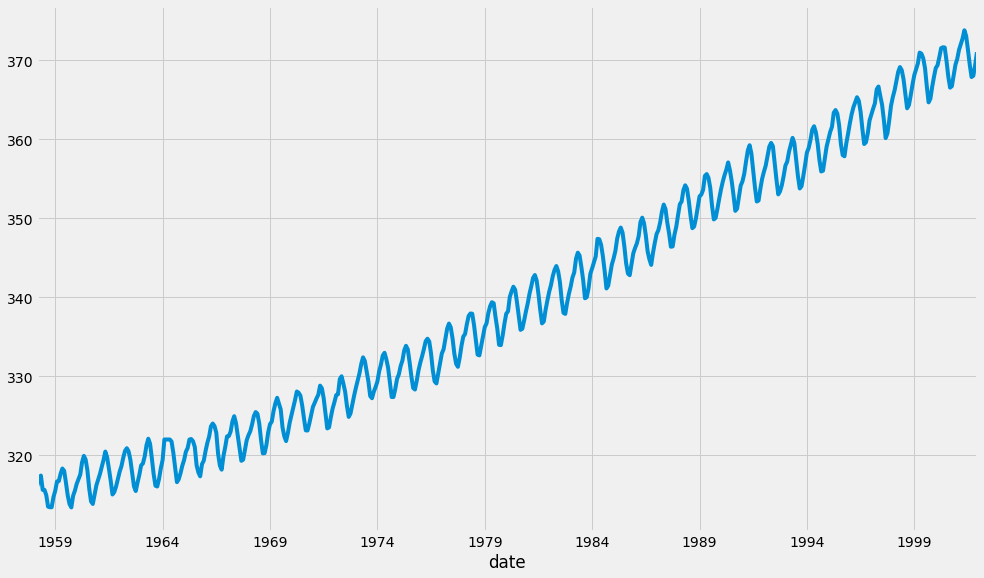

In [ ]:
y = y.fillna(y.bfill())
y.plot(figsize=(15,9))
plt.show()

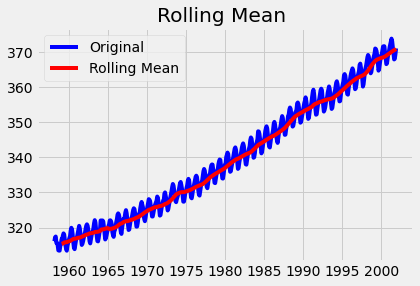

In [ ]:
rollingmean = y.rolling(window=12).mean()
rollingstd = y.rolling(window=12).std()
orig = plt.plot(y, color='blue', label='Original')
mean = plt.plot(rollingmean , color='red', label='Rolling Mean')
#std = plt.plot(rollingstd, color='black', label='Rolling Std')
plt.rcParams["figure.figsize"] = (30,9)

plt.legend(loc='best')
plt.title('Rolling Mean ')
plt.show(block=False)

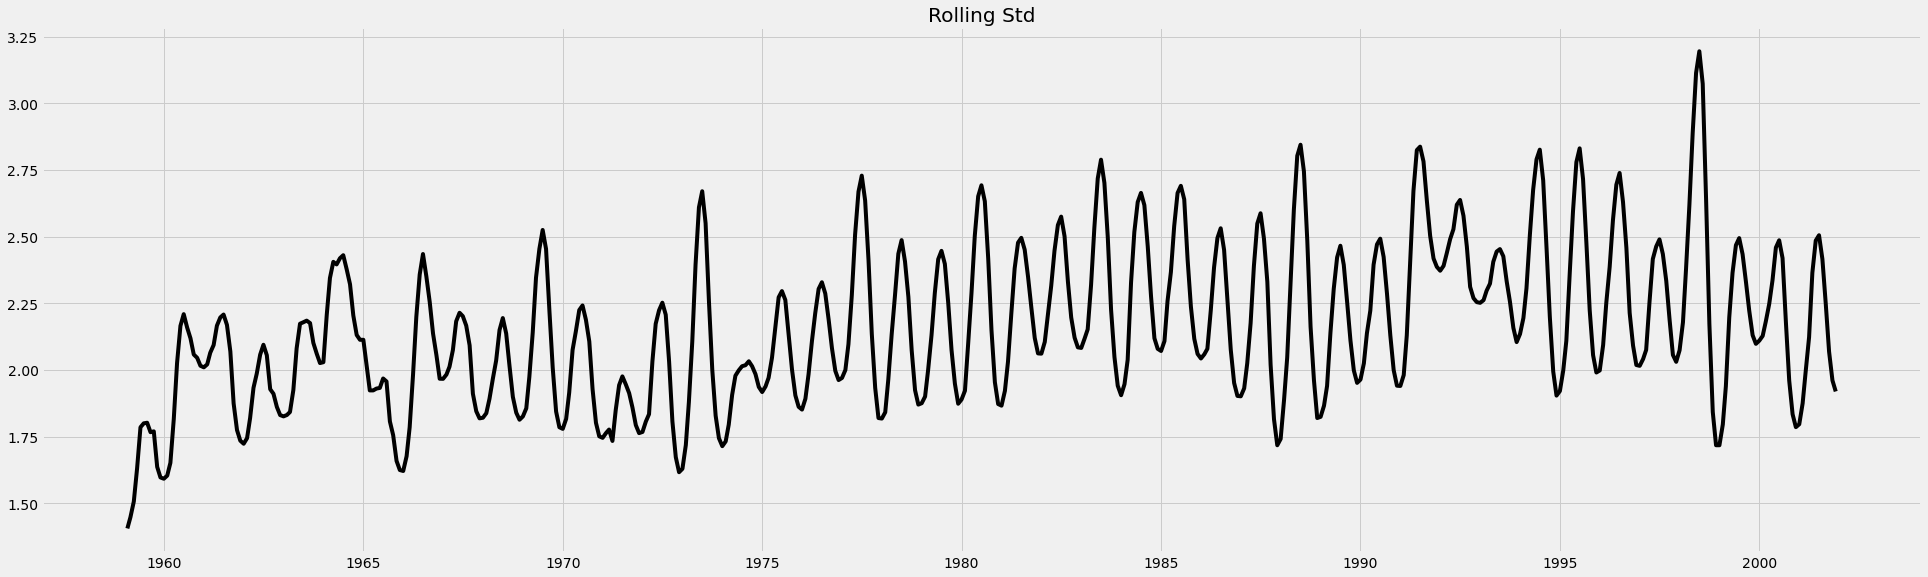

In [ ]:
std = plt.plot(rollingstd, color='black', label='Rolling Std')
plt.title('Rolling Std')
plt.show(block=False)

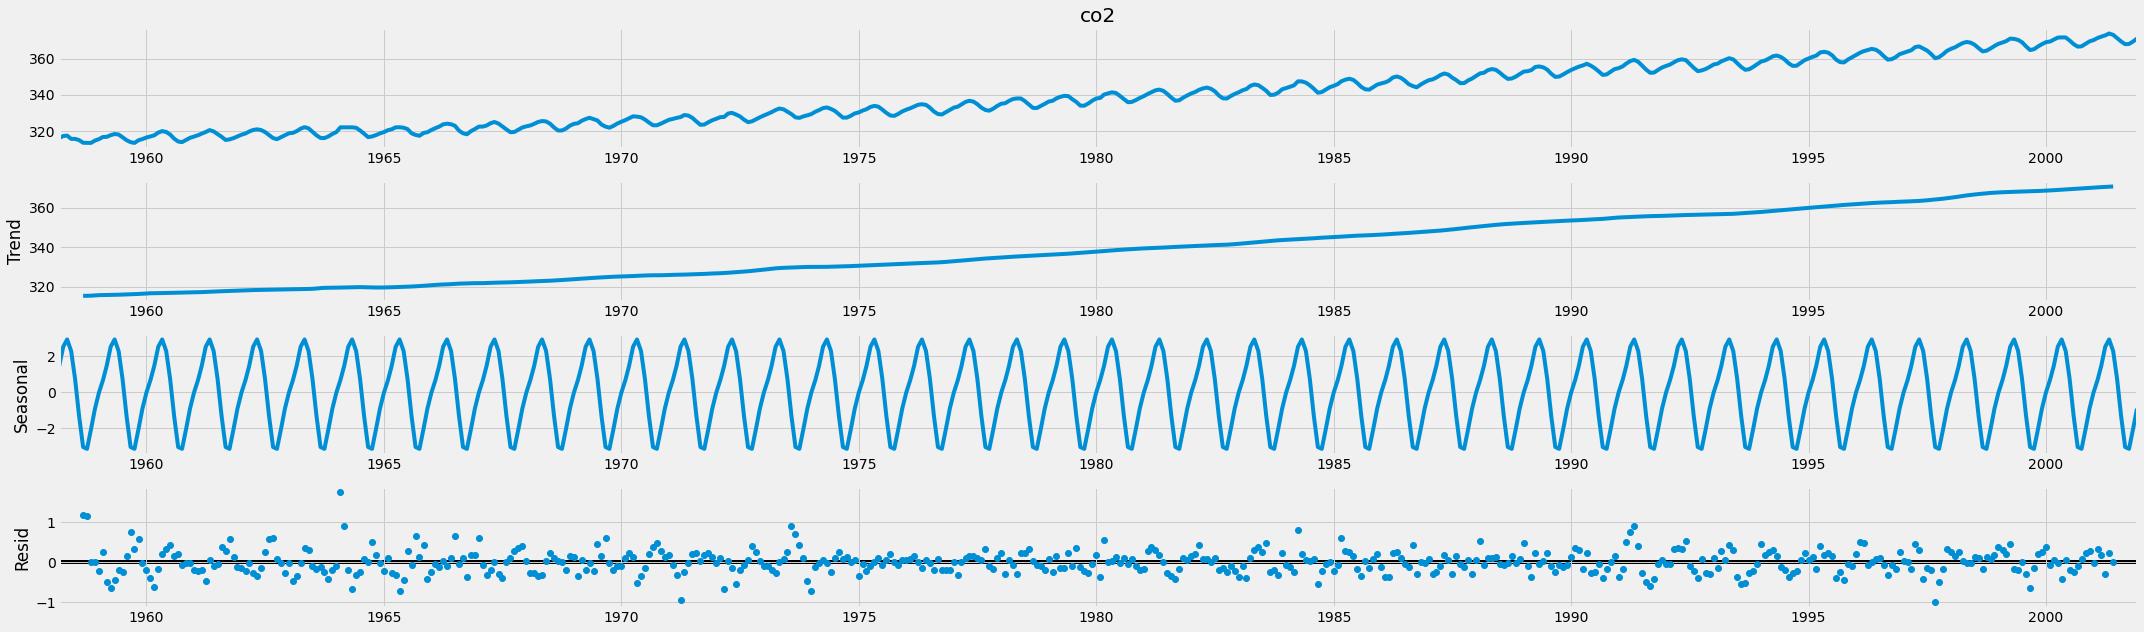

In [ ]:
deco = sm.tsa.seasonal_decompose(y, model='additive')
fig = deco.plot()
plt.rcParams["figure.figsize"] = (30,10)
plt.show()

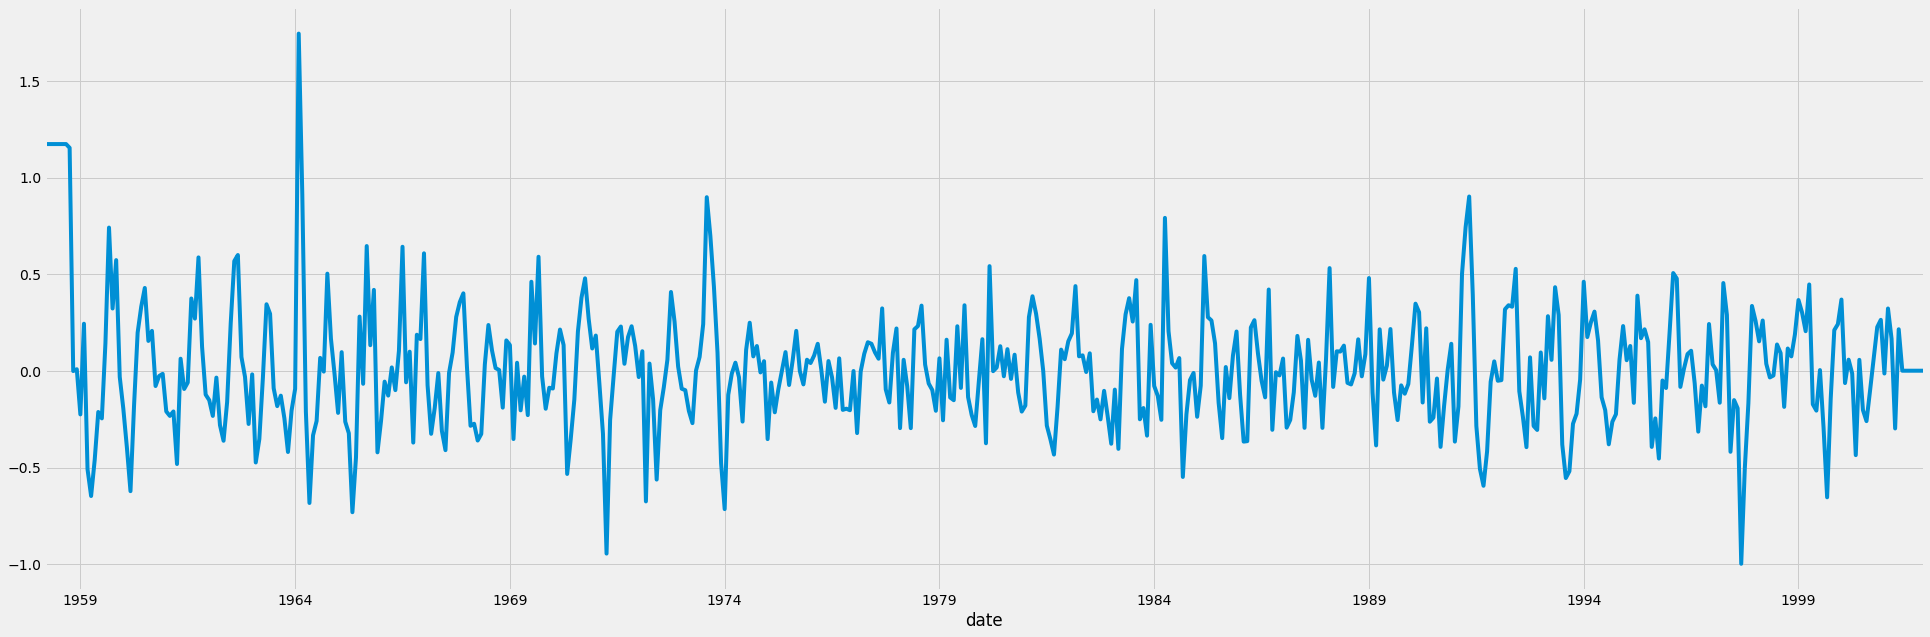

In [ ]:
CO2Residual = deco.resid
CO2Residual = CO2Residual.fillna(CO2Residual.bfill())
CO2Residual = CO2Residual.fillna(CO2Residual.ffill())
fig = CO2Residual.plot()
plt.show()

In [ ]:
NathanADFresult = adfuller(CO2Residual)
print('ADF Statistic: %f' % NathanADFresult[0])
print('p-value: %f' % NathanADFresult[1])
print('Critical Values:')
for key, value in NathanADFresult[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.181866
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


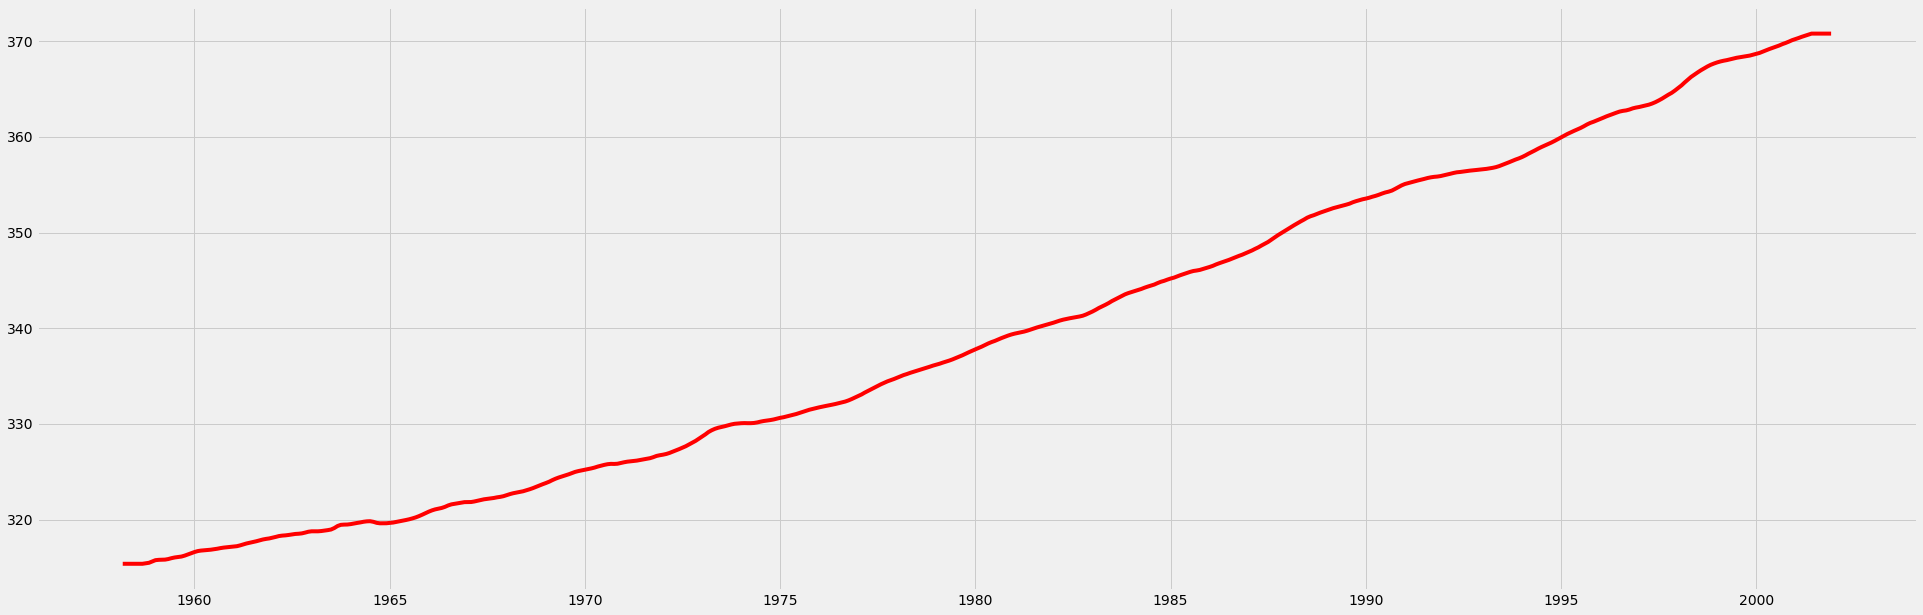

In [ ]:
CO2trend = deco.trend
CO2trend = CO2trend.fillna(CO2trend.bfill())
CO2trend = CO2trend.fillna(CO2trend.ffill())
mean = plt.plot(CO2trend , color='red', label='CO2trend')

In [ ]:
NathanADFresult = adfuller(CO2trend)
print('ADF Statistic: %f' % NathanADFresult[0])
print('p-value: %f' % NathanADFresult[1])
print('Critical Values:')
for key, value in NathanADFresult[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.761347
p-value: 0.998269
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


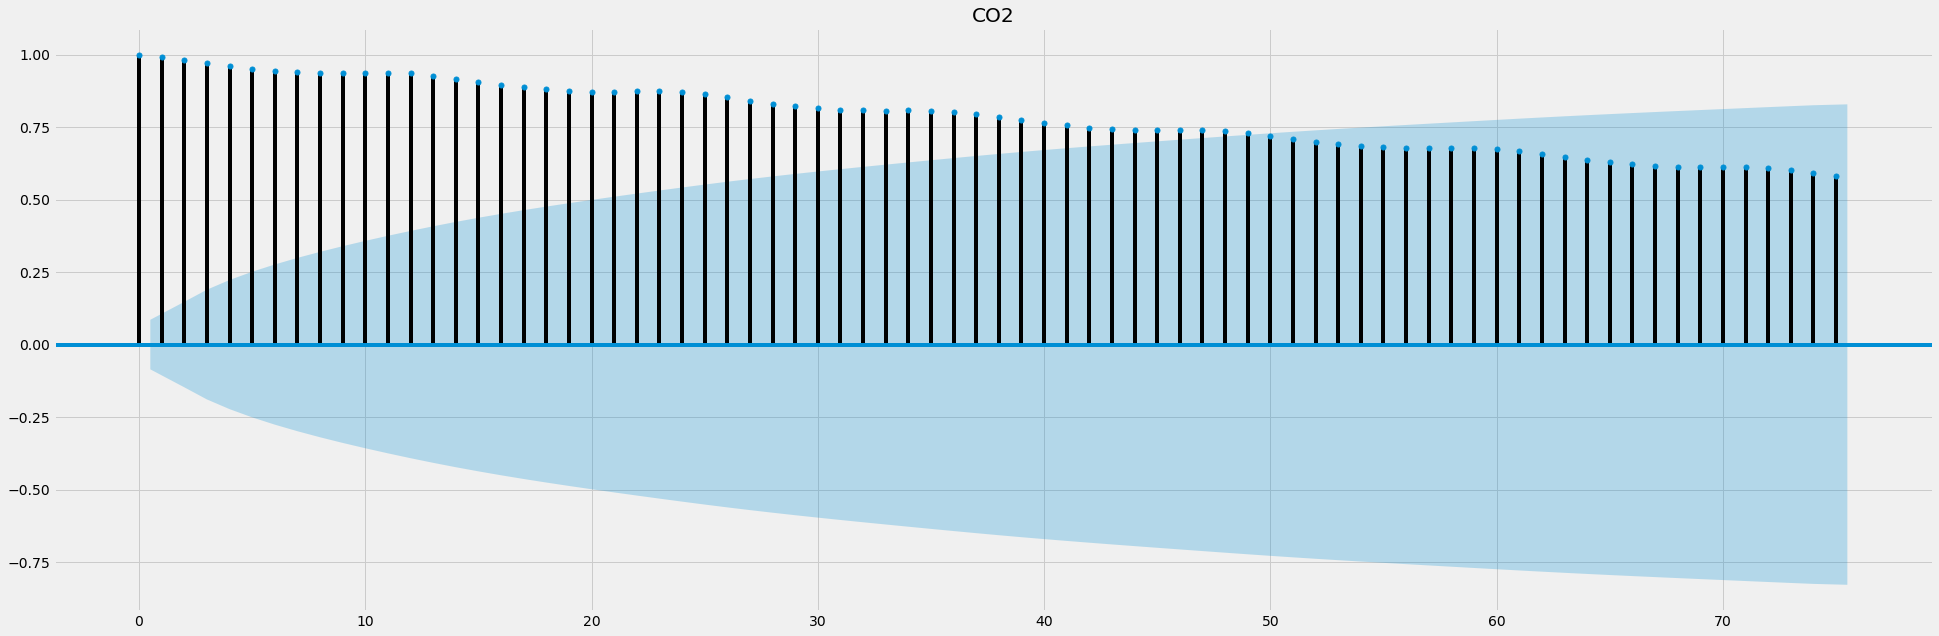

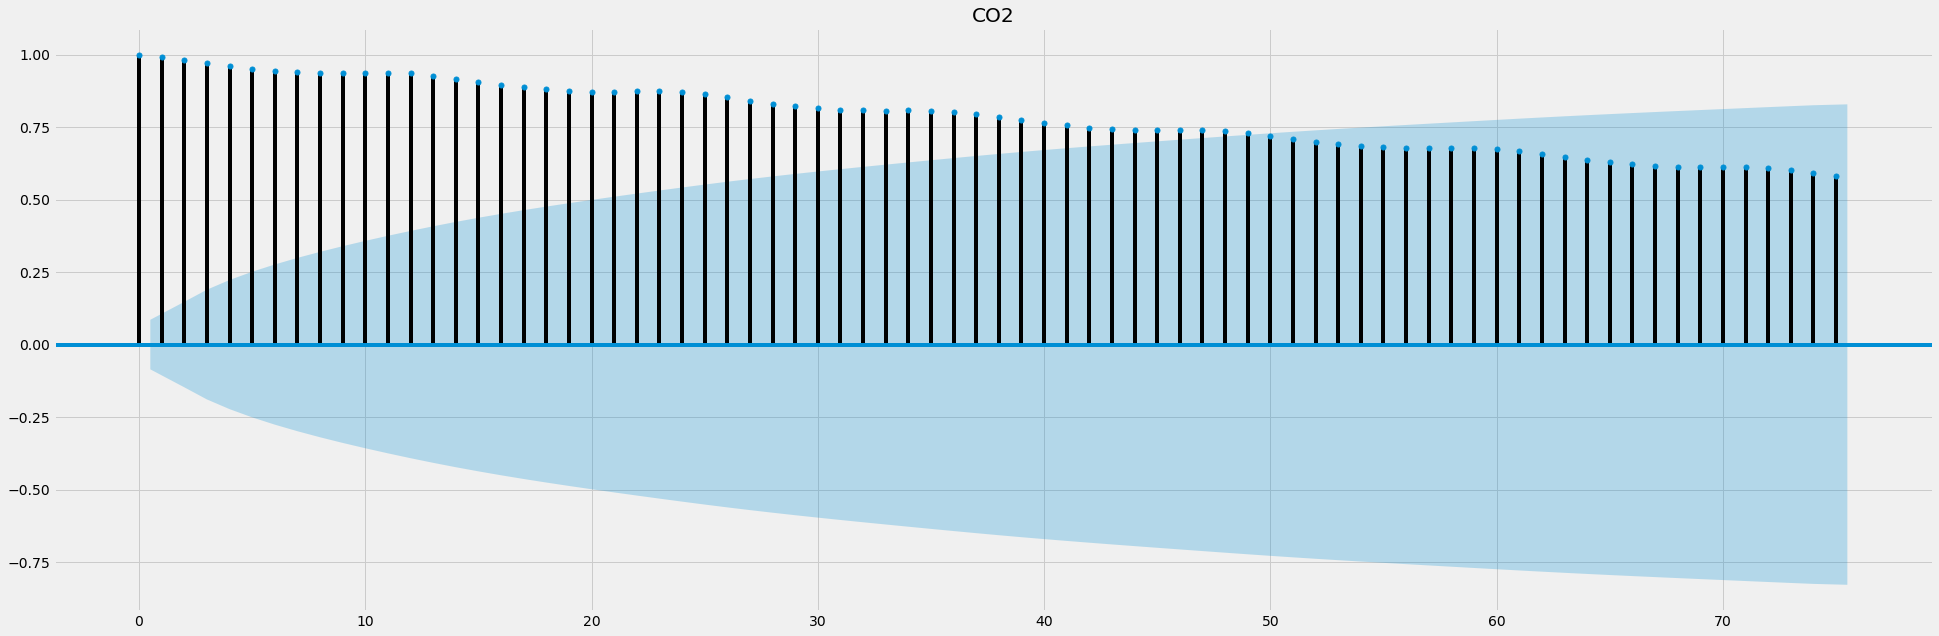

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plot_acf(CO2Residual,title="CO2")
plot_acf(y,lags=75,title="CO2")

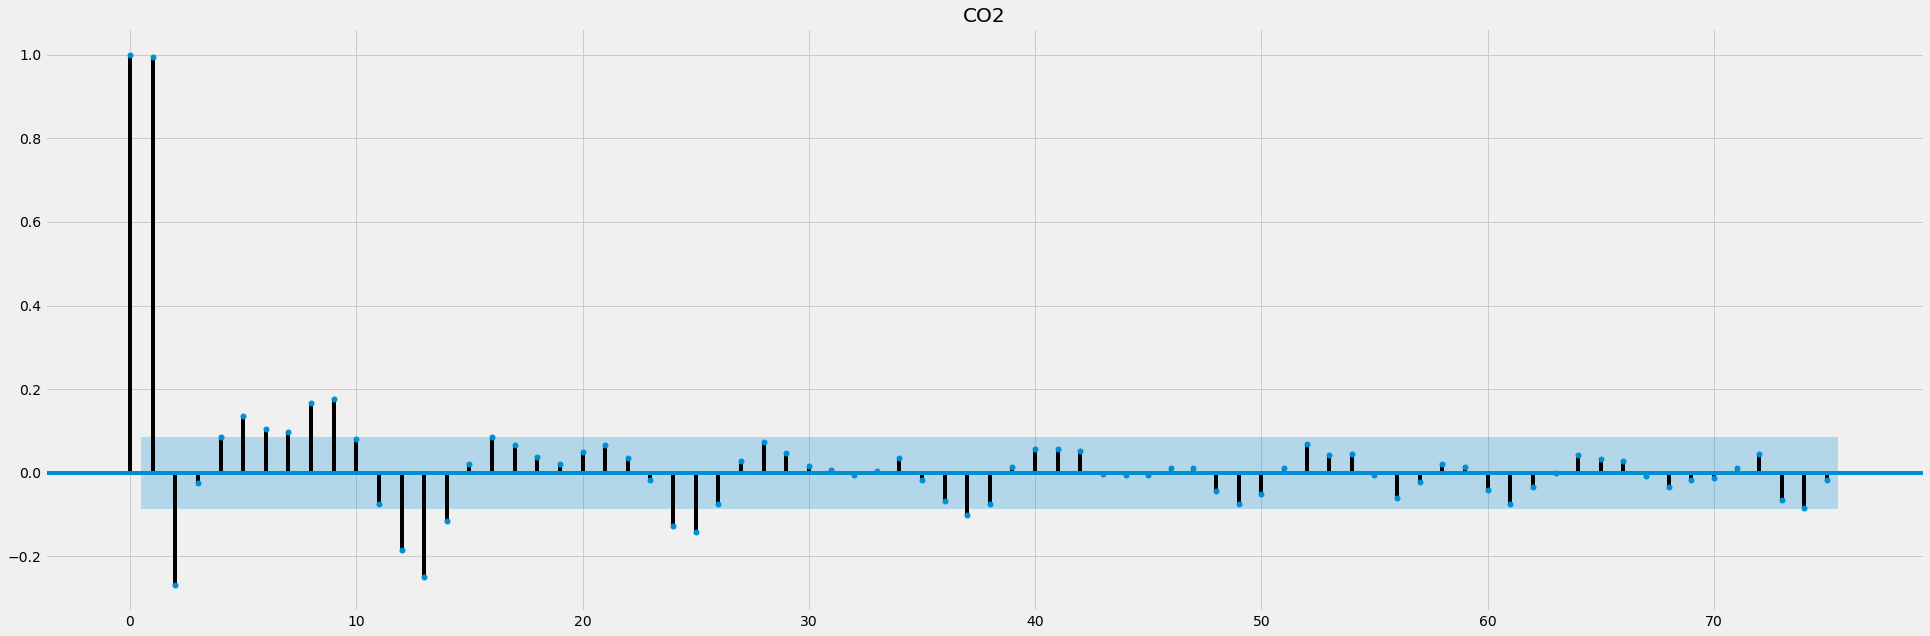

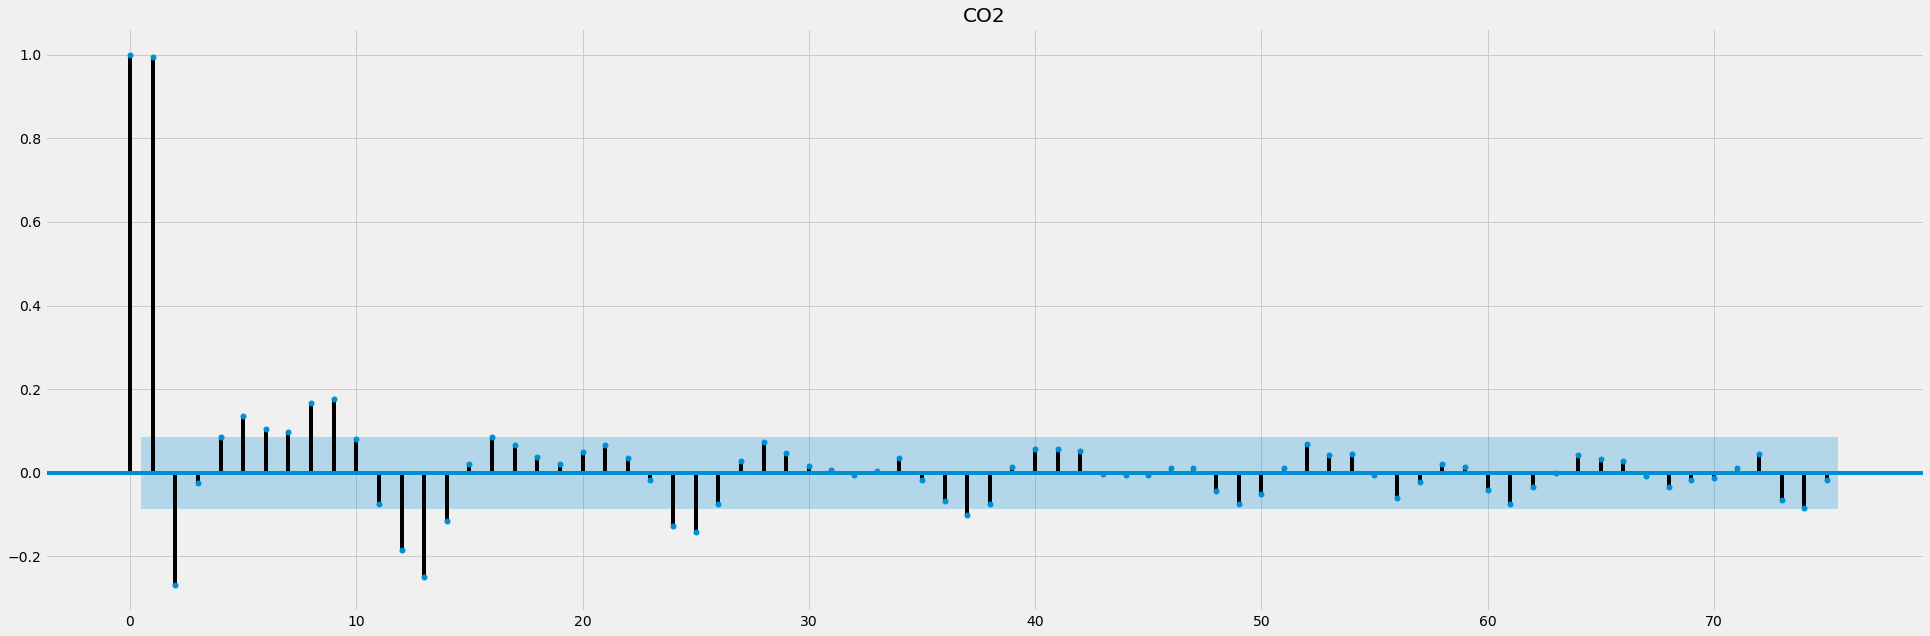

In [ ]:
#plot_pacf(CO2Residual,title="CO2")
plot_pacf(y,lags=75,title="CO2")

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5651      0.051     11.174      0.000       0.466       0.664
ma.L1          0.3432      0.058      5.935      0.000       0.230       0.457
sigma2         0.6458      0.048     13.579      0.000       0.553       0.739


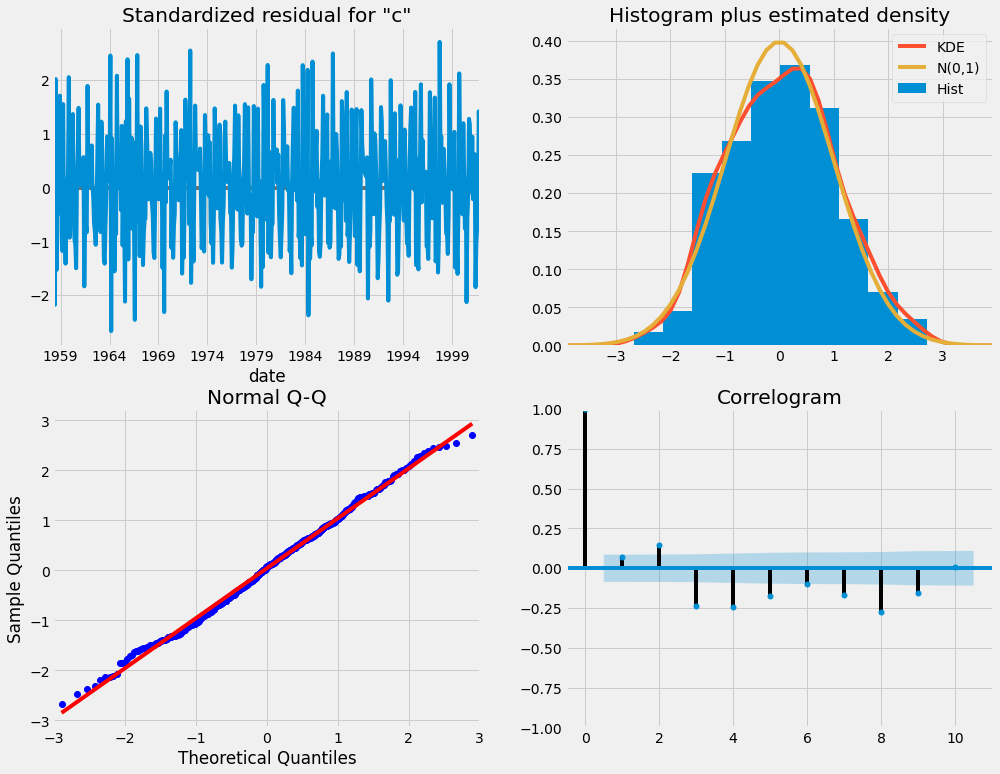

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
				)

TSresults = mod.fit()

print(TSresults.summary().tables[1])

TSresults.plot_diagnostics(figsize=(15, 12))
plt.show()

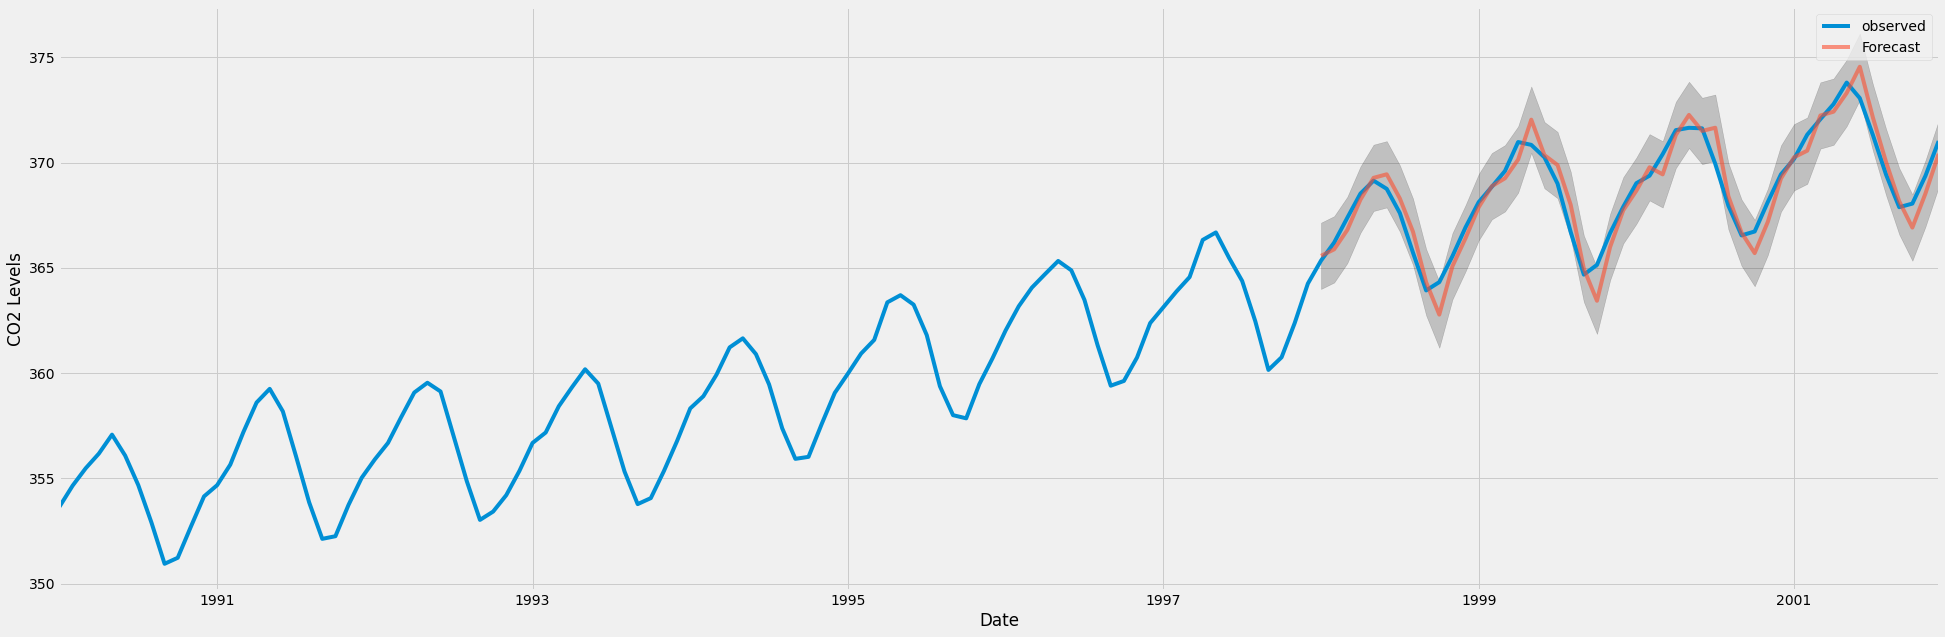

,lower co2,upper co2
date,,
1998-01-01,363.993241,367.143395
1998-02-01,364.302464,367.452618
1998-03-01,365.221551,368.371705
1998-04-01,366.662384,369.812537
1998-05-01,367.698431,370.848585


In [ ]:
pred = TSresults.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters. 

ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()
pred_ci.head()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.57


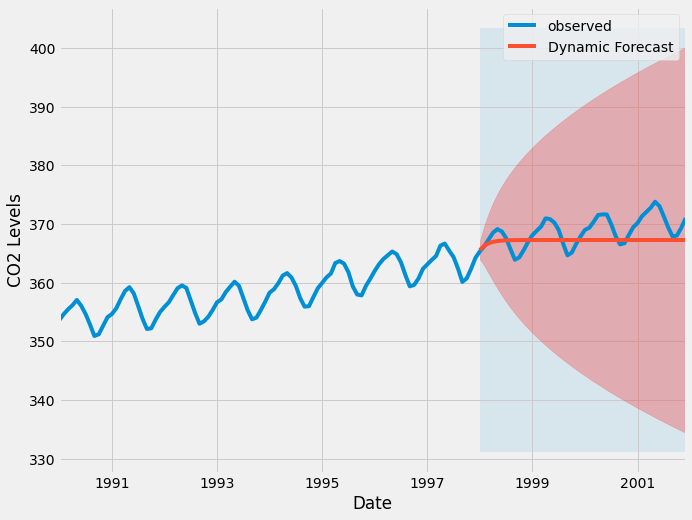

In [ ]:
#pred_dynamic = TSresults.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False, full_results=True)
pred_dynamic = TSresults.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()


ax = y['1990':].plot(label='observed', figsize=(10, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='r', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()
